# Project: Human Resources Analysis
This is a exploratory data analysis based on a company talent datadet from Kaggle. It aims to uncover key patterns and trends and contribute to talent accquisition.

## Dataset Description
This is a synthetic dataset from kaggle, which provides a variety of features that are useful for both data visualization and creating machine learning / predictive analytics models. 

The CSV revolves around a fictitious company and the core data set contains names, DOBs, age, gender, marital status, date of hire, reasons for termination, department, whether they are active or terminated, position title, pay rate, manager name, and performance score.

## Modules Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Cleaning

In [51]:
df= pd.read_csv('../data/HRDataset_v14.csv', skipinitialspace=True)

# Parse the columns that contains date values
raw_date = ['DateofHire','DateofTermination',  'LastPerformanceReview_Date']
df[raw_date] = df[raw_date].apply(lambda date_col: pd.to_datetime(date_col, format='%m/%d/%Y', errors='coerce'))

# Column 'DOB' contains a different date format than other date columns so we need to separate it
def adjust_year(date_str):
    """ Adjust two-digit year to be in the 1900s if it's after current year. """
    try:
        date_obj = datetime.strptime(date_str, '%m/%d/%y')
        if date_obj.year > datetime.now().year:
            date_obj = date_obj.replace(year=date_obj.year - 100)
        return date_obj
    except ValueError:
        return pd.NaT
df['DOB'] = df['DOB'].apply(adjust_year)

# Preview of the top rows of the dataset
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


In [52]:
# Check columns and data types of each rows 
df.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

In [53]:
# Combine values of 'Yes' and 'yes' and 'No' and 'no'
df.loc[df['HispanicLatino'] =='yes', 'HispanicLatino'] = 'Yes'
df.loc[df['HispanicLatino'] =='no', 'HispanicLatino'] = 'No'

# Remove the trailing space in position_name column
#Before
print('Data Analyst Count:', (df['Position'] == 'Data Analyst').sum()) 
print('Production Count:', (df['Department'] == 'Production').sum())

df = df.map(lambda value: value.strip() if isinstance(value, str) else value)
#After
print('\nNew Data Analyst Count:', (df['Position'] == 'Data Analyst').sum())
print('New Production Count:', (df['Department']=='Production').sum())

Data Analyst Count: 7
Production Count: 0

New Data Analyst Count: 8
New Production Count: 209


In [54]:
# Let us also add a column for age
def calculate_age(date_of_birth, current_date):
    if pd.isna(date_of_birth):
        return None
    age = current_date.year - date_of_birth.year - ((current_date.month, current_date.day) < (date_of_birth.month, date_of_birth.day))
    return age
df['Age'] = df['DOB'].apply(lambda dob: calculate_age(dob, datetime.now()))
df['Age'].head()

0    41
1    49
2    36
3    36
4    35
Name: Age, dtype: int64

In [57]:
# Let's create age groups
age_group = [24, 34, 44, 54, 64,100]
label_age_group = ['25-34', '35-44', '45-54', '55-64', '65 and up']
df['AgeRange'] = pd.cut(df['Age'], age_group, labels=label_age_group)
df['AgeRange'] = pd.Categorical(df['AgeRange'])
# Preview
df[['Age', 'AgeRange']].head()

,Age,AgeRange
0,41,35-44
1,49,45-54
2,36,35-44
3,36,35-44
4,35,35-44


In [58]:
# Let's add another column for years of service
def calculate_years_of_service(date_of_hire, date_of_termination):
    end_date = date_of_termination if (pd.notnull(date_of_termination)) else datetime.now().date()
    years_of_service = end_date.year - date_of_hire.year - ((end_date.month, end_date.day) < (date_of_hire.month, date_of_hire.day))
    return years_of_service
df['YearsofService'] = df.apply(lambda row: calculate_years_of_service(row['DateofHire'], row['DateofTermination']), axis=1)
df[['DateofHire', 'DateofTermination','YearsofService']].head(10)

,DateofHire,DateofTermination,YearsofService
0,2011-07-05,NaT,13
1,2015-03-30,2016-06-16,1
2,2011-07-05,2012-09-24,1
3,2008-01-07,NaT,17
4,2011-07-11,2016-09-06,5
5,2012-01-09,NaT,13
6,2014-11-10,NaT,10
7,2013-09-30,NaT,11
8,2009-07-06,NaT,15
9,2015-01-05,NaT,10


In [62]:
# Salary Bins
salary_range =  [45000, 55000, 65000, 75000, 90000, 120000, 250000]
salary_label = ['45k - 55k', '55k - 65k', '65k - 75k', '75k - 90k', '90k - 120k', '120k and up']
df['SalaryRange'] = pd.cut(df['Salary'], salary_range, labels=salary_label)
df['SalaryRange'].value_counts()

SalaryRange
55k - 65k      120
45k - 55k       75
65k - 75k       53
90k - 120k      31
75k - 90k       22
120k and up     10
Name: count, dtype: int64

In [63]:
# Years of Service (YOS) Bins 
yos_range = [1, 3, 5, 10, 18]
yos_range_title = ['1 - 3 years', '3 - 5 years', '5 - 10 years', '10 years and up']
# test = staff_data.copy()
df['YOSRange'] = pd.cut(df['YearsofService'], yos_range, labels=yos_range_title)
# staff_data['yos_range']
df['YOSRange'].value_counts()

YOSRange
10 years and up    114
5 - 10 years       106
1 - 3 years         33
3 - 5 years         28
Name: count, dtype: int64

## Data Exploration

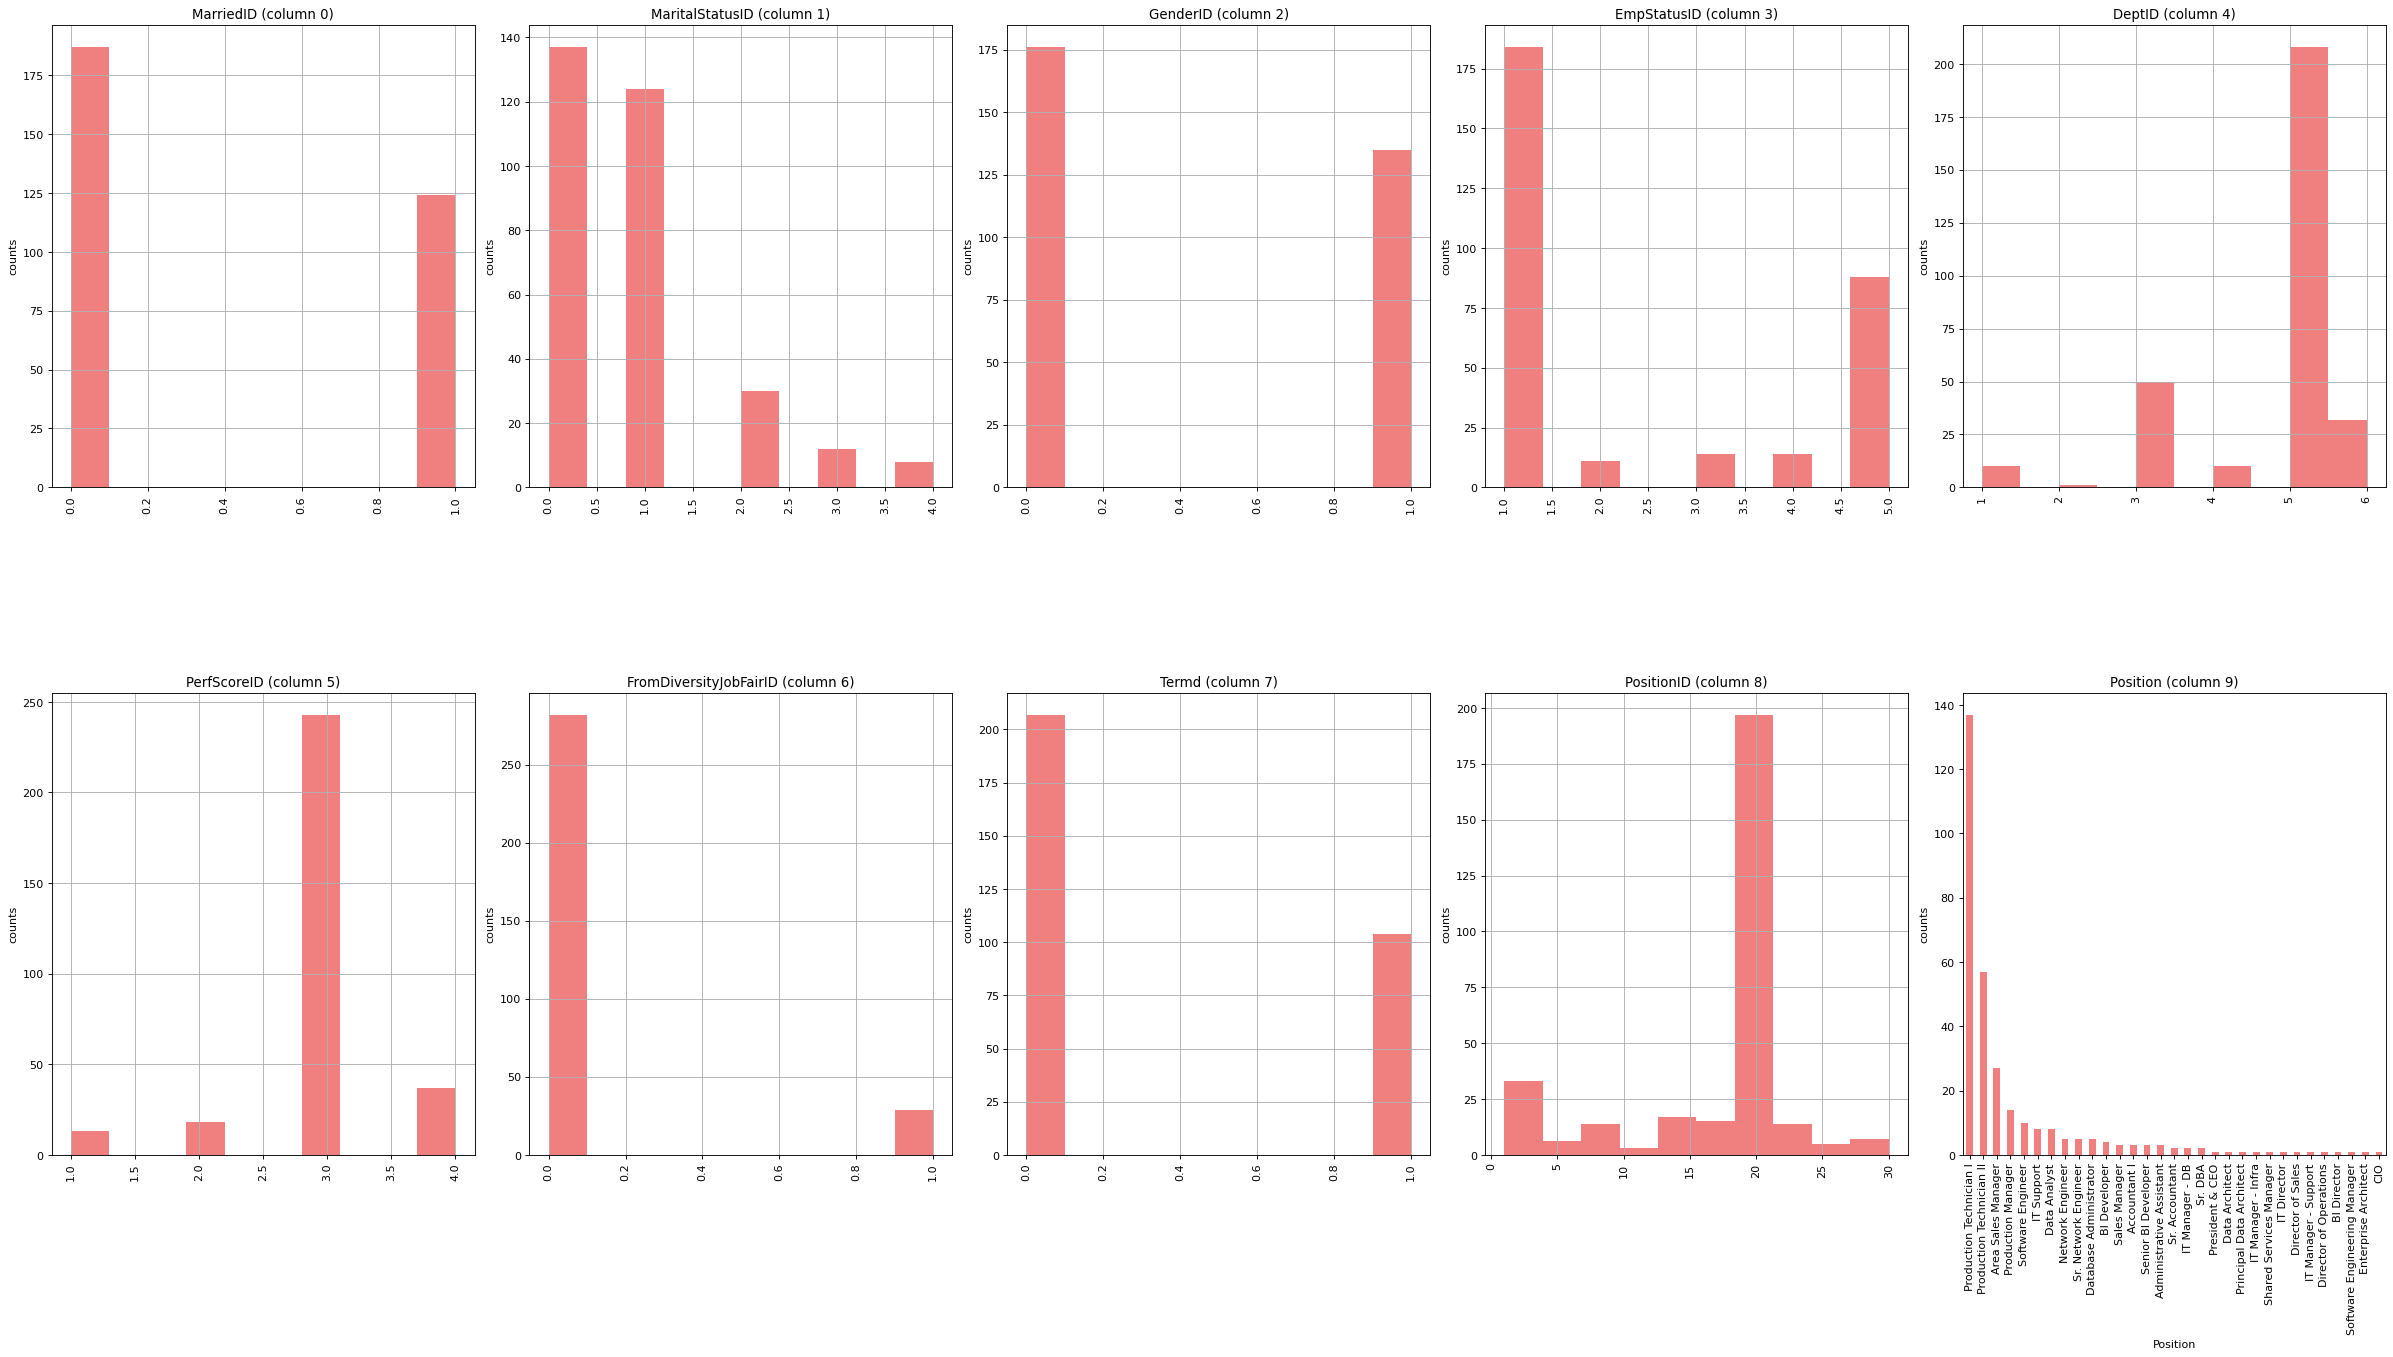

In [59]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar(color='lightcoral')
        else:
            columnDf.hist(color='lightcoral')
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(df, 10, 5)


Above is a subplot containing multiple plots, we can also extract a single plot that we are interested in

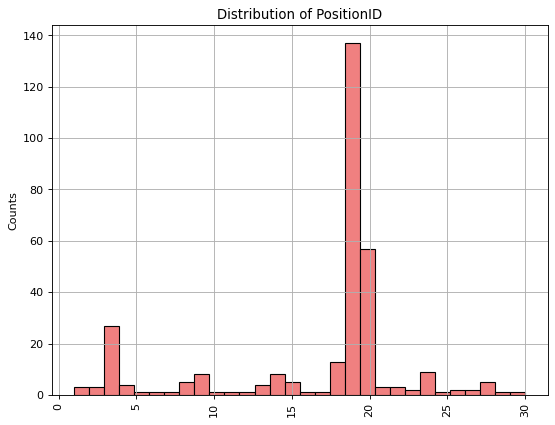

In [60]:
column_name = 'PositionID'  # Replace it with a column that we are interested in
columnDf = df[column_name]

plt.figure(figsize=(8, 6), dpi=80)
if not np.issubdtype(columnDf.dtype, np.number):  # Categorical column
    columnDf.value_counts().plot.bar(color='lightcoral')
else:  # Numeric column
    columnDf.hist(bins=30, edgecolor='k',color='lightcoral')

plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title(f'Distribution of {column_name}')
plt.show()

## Active Employees Analysis

In [65]:
# Active Employees
active_employees = df[df['EmploymentStatus'] =='Active']
print('No of total active employees: ', len(active_employees))

No of total active employees:  207


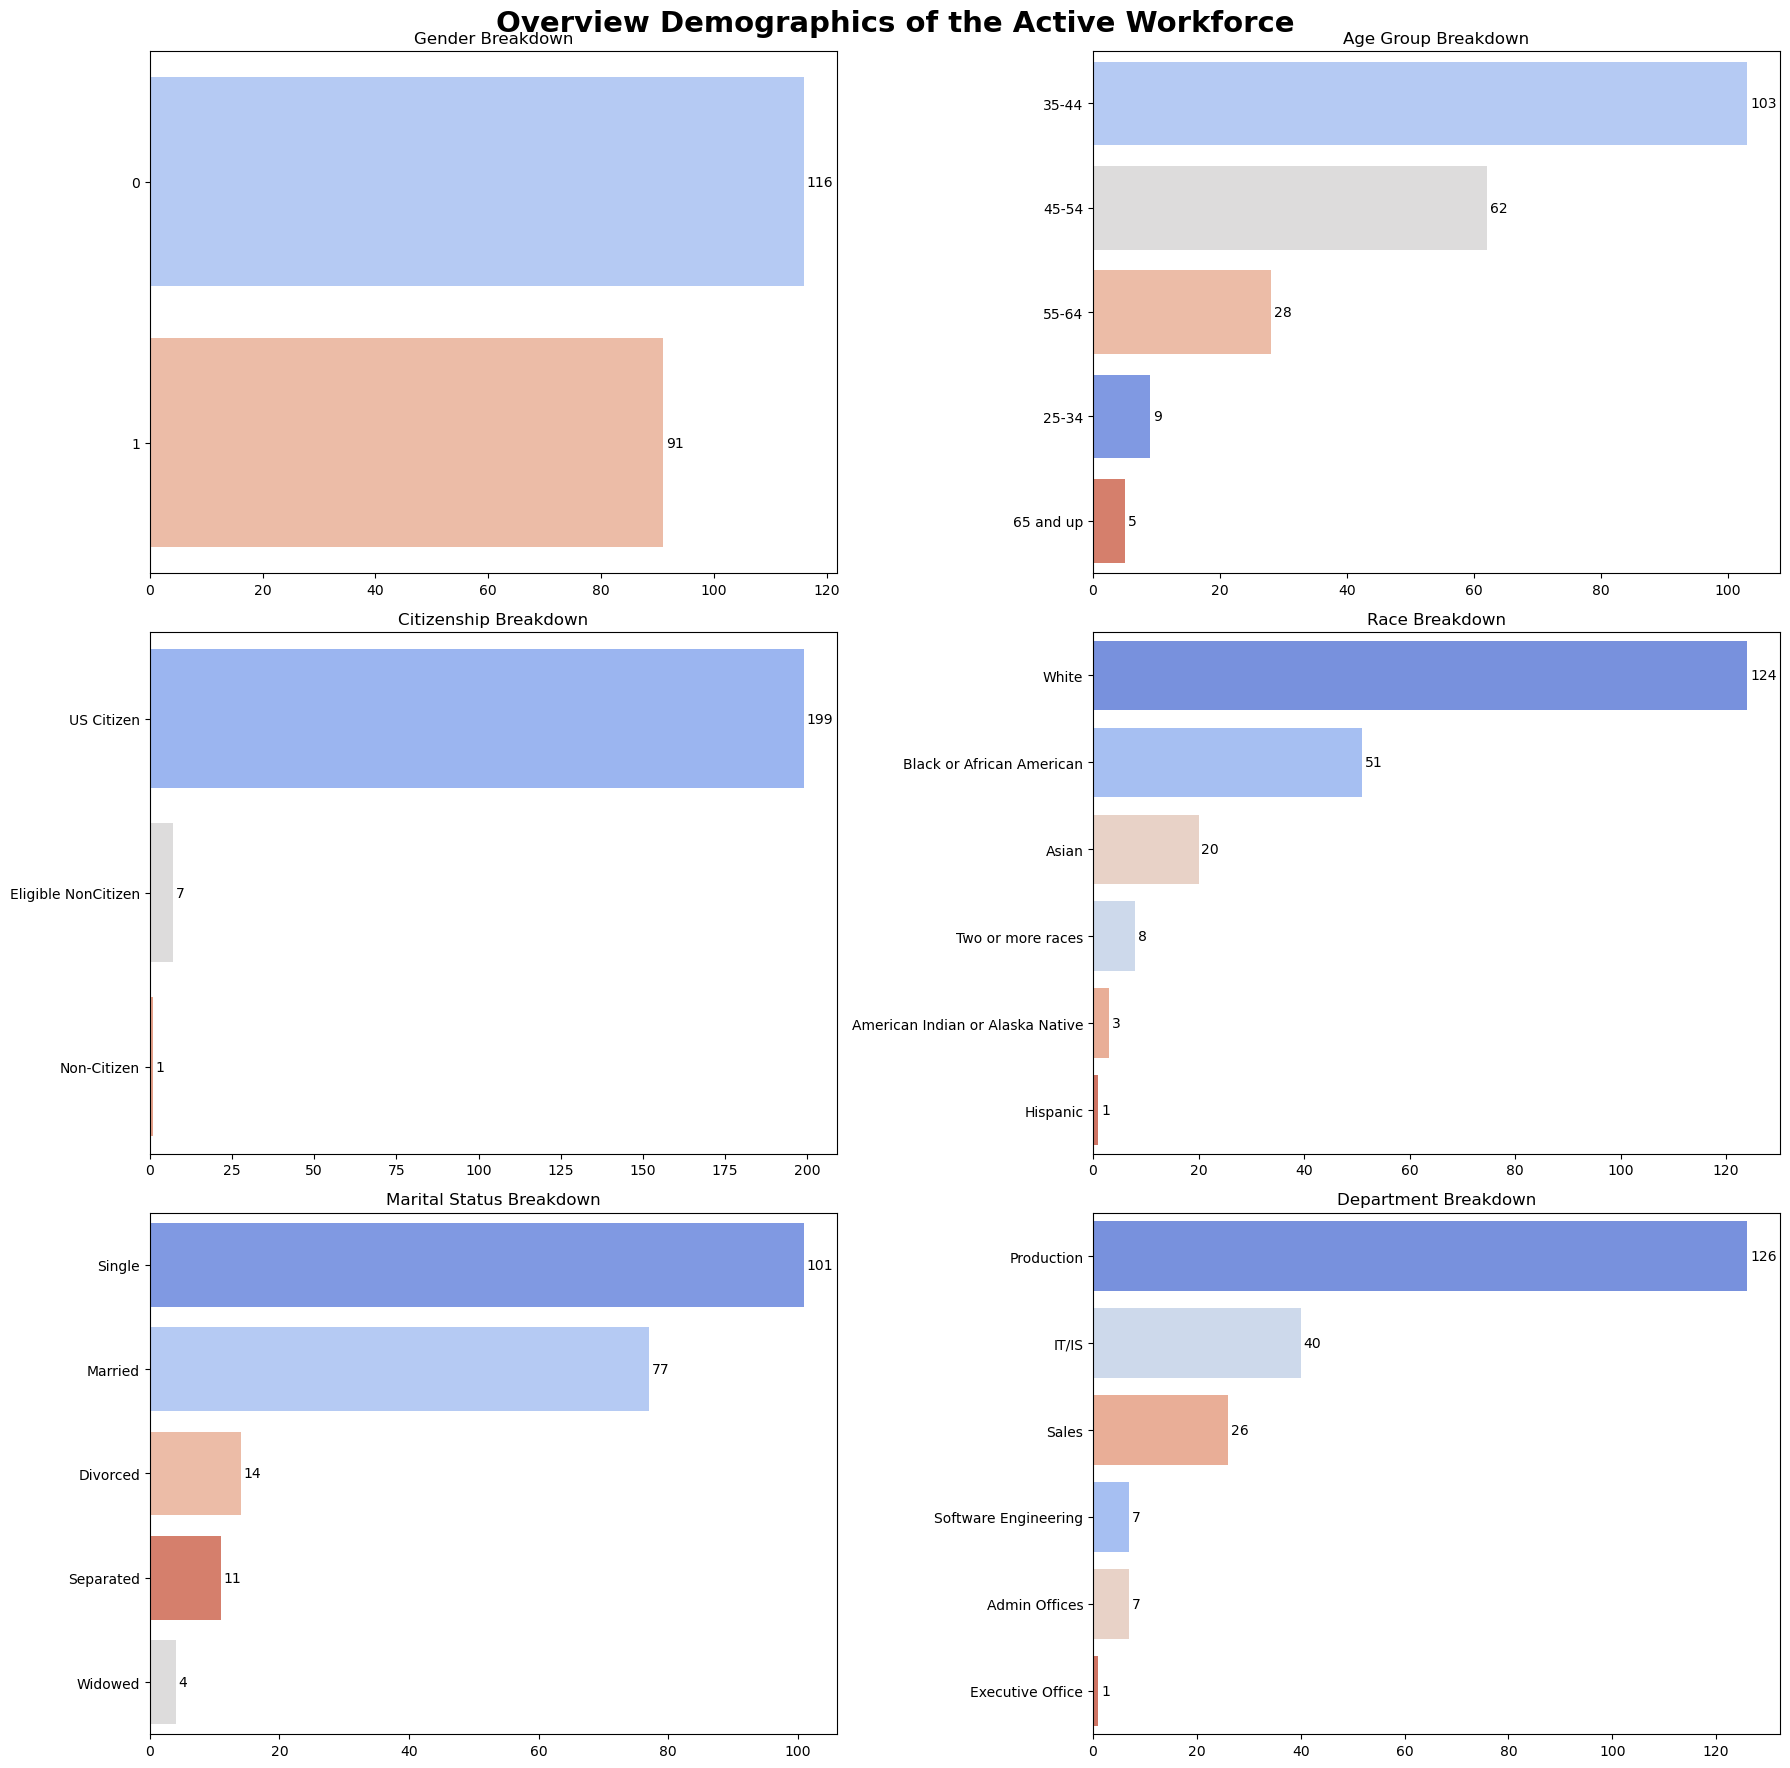

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

demo_var = ['GenderID', 'AgeRange', 'CitizenDesc', 'RaceDesc', 'MaritalDesc', 'Department']
demo_var_title = ['Gender', 'Age Group', 'Citizenship', 'Race', 'Marital Status', 'Department']
unordered_var = ['age_group']

fig, axes = plt.subplots((len(demo_var)//2), 2, figsize=(18, 3*len(demo_var)))
plt.suptitle('Overview Demographics of the Active Workforce', size=21, weight='extra bold')

axes = axes.flatten()

for i, (variable, title) in enumerate(zip(demo_var, demo_var_title)):
    if variable in unordered_var:
        sns.countplot(data=active_employees, y=variable, ax=axes[i], hue=variable, palette="coolwarm", legend=False)
    else:
        sns.countplot(data=active_employees, y=variable, ax=axes[i], 
                      order=active_employees[variable].value_counts().index, 
                      hue=variable, palette="coolwarm", legend=False)

    axes[i].set_title(f'{title} Breakdown')

    # Iterate through all columns and add labels
    for container in axes[i].containers:
        axes[i].bar_label(container, padding=2)

    axes[i].set(xlabel=None, ylabel=None)

plt.tight_layout()


### Conclusion Based on Active Workforce Analysis
1. **Gender Breakdown**
- The workforce is relatively balanced in terms of gender, with 116 male employees and 91 female employees.
- This suggests a fairly even distribution, though slight variations could be influenced by industry trends or hiring preferences
2. **Age Group Breakdown**
- The majority of employees fall within the 35-44 age group (103 employees) and 45-54 age group (62 employees).
- Younger employees (25-34 years: 9 employees) and senior employees (65 and up: 5 employees) are significantly fewer, indicating a workforce primarily composed of mid-career professionals.
3. **Citizenship Breakdown**
- The workforce is predominantly composed of U.S. Citizens (139 employees). 
- There is a small portion of Eligible Non-Citizens (7 employees) and Non-Citizens (1 employee), suggesting a relatively low level of international representation.
4. **Race Breakdown**
- The majority of employees are White (124 employees), followed by Black or African American (51 employees).
- Other racial groups, including Asian (20 employees), Two or More Races (8 employees), American Indian or Alaska Native (3 employees), and Hispanic (1 employee), make up a smaller portion of the workforce.
- This distribution may reflect demographic trends within the industry or company location.
5. **Marital Status Breakdown of Active Employees**
- The workforce includes a high number of Single (101 employees) and Married (77 employees) individuals.
- Divorced (14 employees), Separated (11 employees), and Widowed (4 employees) employees make up a smaller proportion, indicating that most employees are either single or married.
6. **Department Breakdown of Active Employees**
- The Production department (126 employees) is the largest, suggesting that this is a core function of the company.
- Other departments include IT/IS (40 employees), Sales (26 employees), Software Engineering (7 employees), Admin Offices (7 employees), and Executive Office (1 employee).
- The relatively small number of employees in Software Engineering and Admin Offices suggests these are more specialized functions within the organization.

### Recommendations
- **Non-Binary Employee Data**: Including a category for non-binary employees in the gender classification would provide a more accurate representation of gender diversity within the company and support inclusive practices.
- **Record of Employee's Dependents**: Introducing a field to track employee's dependents could offer a valuable information for designing benefits and support programs tailored to the employee's family needs
- **HR Department Records**: Capturing specific data for HR employees could help in understanding their role, impact, and distribution within the company, aiding in better HR department and resource planning

## Comparisons across Various Variables

**Correlation Matrix**

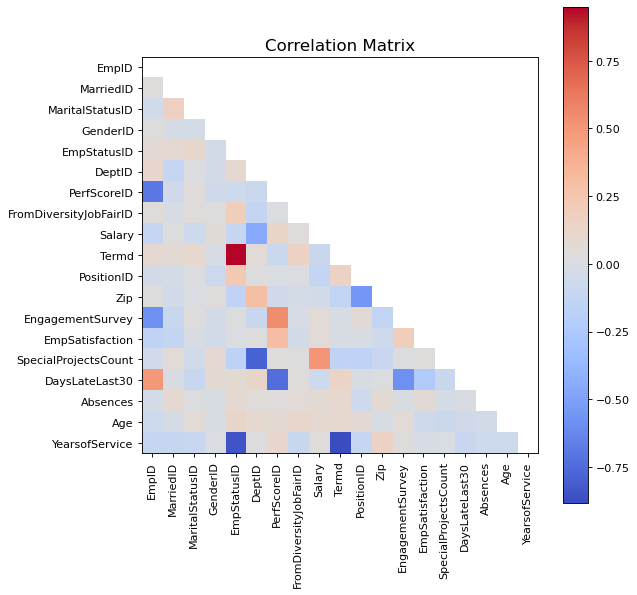

In [71]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna(axis=1)  # drop columns with Nan
    df = df.select_dtypes(include=[np.number])  # drop non-numeric columns
    df = df[[col for col in df if df[col].nunique() > 1]]  # drop columns with 1 unique value
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    # hide upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    corr = corr.mask(mask)

    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    plt.matshow(corr, fignum=1, cmap='coolwarm')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar()
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

plotCorrelationMatrix(df, 8)

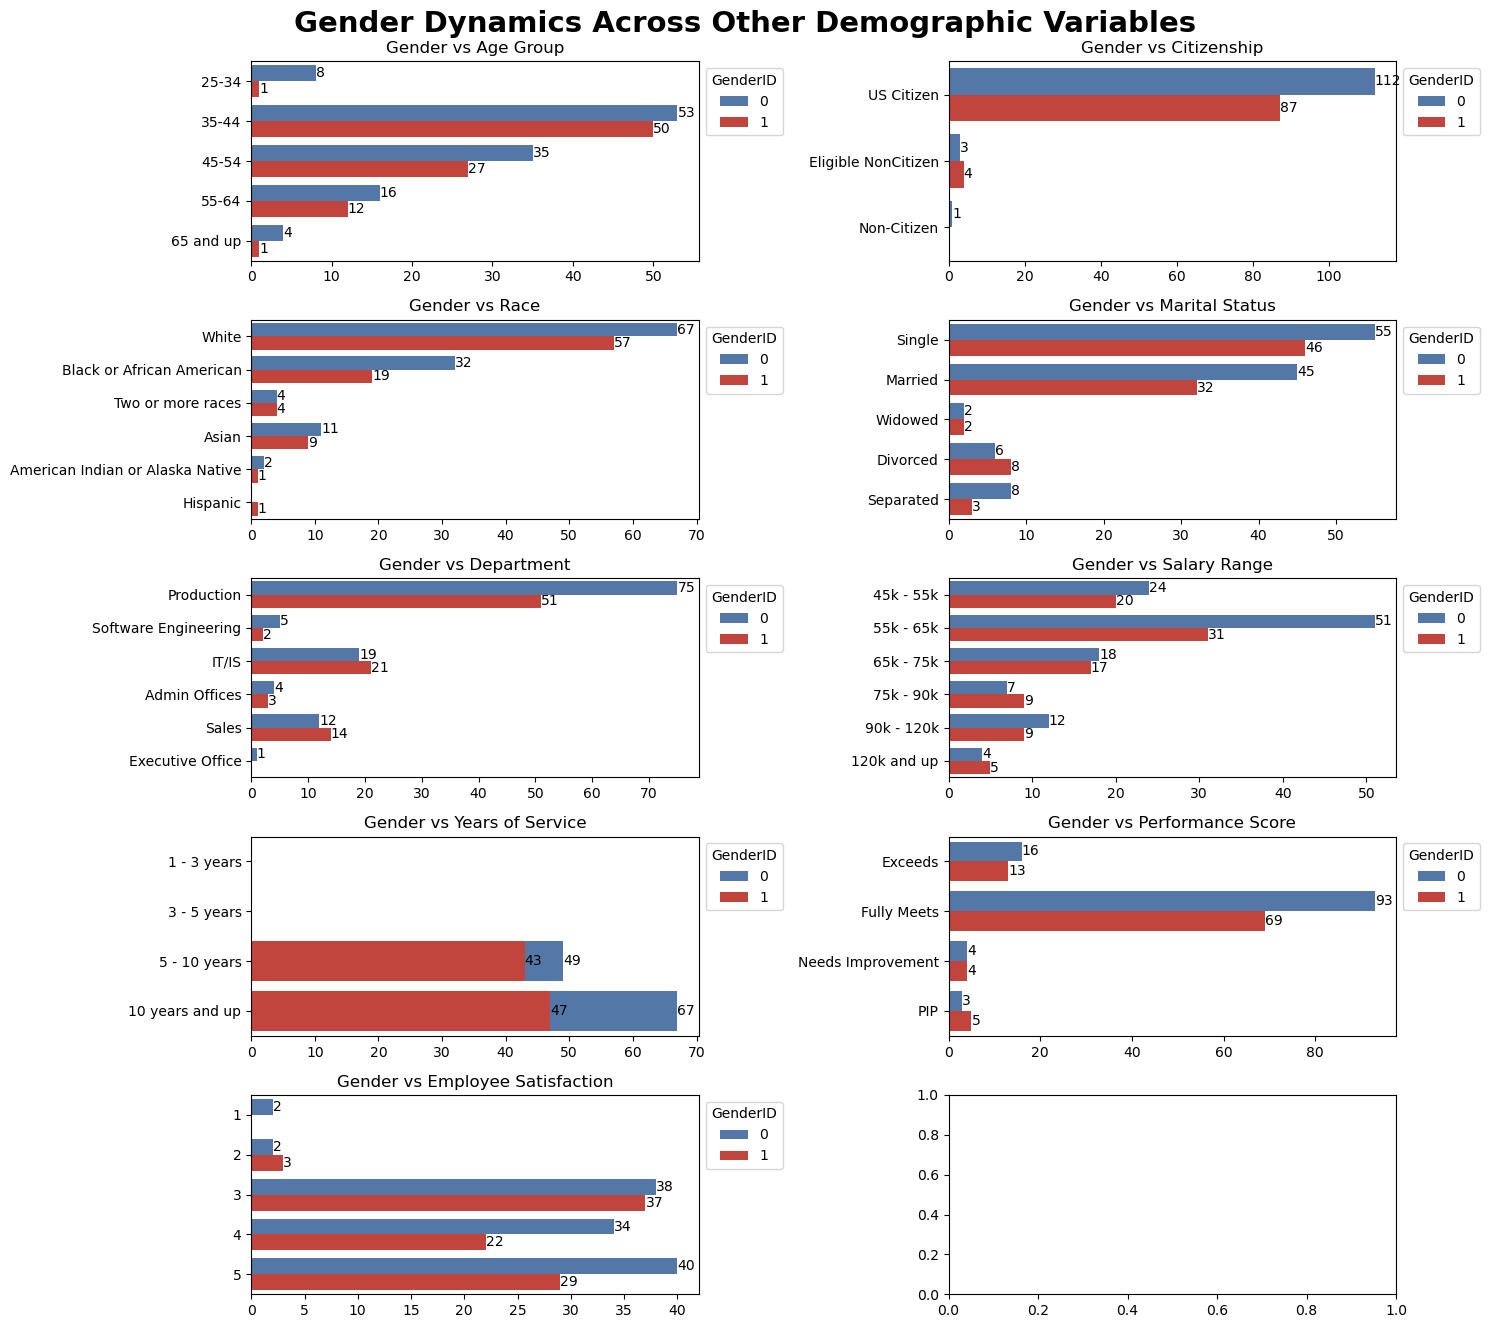

In [ ]:
gender_palette = ['#4575b4', '#d73027']  # Example: Blue for one gender, Orange for another

demo_var = [
    'AgeRange',
    'CitizenDesc',
    'RaceDesc',
    'MaritalDesc',
    'Department',
    'SalaryRange',
    'YOSRange',
    'PerformanceScore',
    'EmpSatisfaction',
]

demo_var_title = [
    'Age Group',
    'Citizenship',
    'Race',
    'Marital Status',
    'Department',
    'Salary Range', 
    'Years of Service', 
    'Performance Score',
    'Employee Satisfaction',
]

fig, axes = plt.subplots(5, 2, figsize=(15, 1.5 * len(demo_var)))
plt.suptitle('Gender Dynamics Across Other Demographic Variables', size=21, weight='extra bold')
axes = axes.flatten()

for i, (attribute, title) in enumerate(zip(demo_var, demo_var_title)):
    sns.countplot(data=active_employees, y=attribute, hue='GenderID', ax=axes[i], palette=gender_palette)  # 🎨 Apply colors
    sns.move_legend(axes[i], "upper left", bbox_to_anchor=(1, 1))
    
    axes[i].set(xlabel=None, ylabel=None)
    axes[i].set_title(f'Gender vs {title}')

    # Add bar labels
    for container in axes[i].containers:
        axes[i].bar_label(container)

plt.tight_layout()


### **Conclusions Based on Gender Analysis**

**1. Gender vs Age**
- The **35-44 age group** has the highest number of employees, with a fairly balanced gender distribution.
- The **25-34 and 45-54 age groups** also have significant representation.
- The **55-64 and 65+ age groups** have fewer employees, indicating an overall younger workforce.

**2. Gender vs Citizenship**
- The majority of employees are **U.S. Citizens**, with a nearly equal gender distribution.
- A small number of employees are **Eligible Non-Citizens or Non-Citizens**, showing limited international representation.

**3. Gender vs Race**
- The workforce is predominantly **White**, followed by **Black or African American employees**.
- Other racial groups, including **Asian, Two or More Races, and Hispanic**, have smaller representations.
- The gender distribution across racial groups is relatively balanced, with minor variations.

**4. Gender vs Marital Status**
- The **Single and Married groups** have the highest number of employees, with an even gender split.
- **Widowed, Divorced, and Separated categories** have significantly fewer employees.

**5. Gender vs Department**
- The **Production department** is the largest, with more male employees than female employees.
- **IT/IS and Sales departments** have a more balanced gender distribution.
- **Software Engineering, Admin Offices, and Executive Office** have fewer employees, with slight gender imbalances.

**6. Gender vs Salary Range**
- Employees are mostly distributed in the **55k-65k salary range**, followed by **45k-55k and 65k-75k**.
- Higher salary ranges (**90k+**) have significantly fewer employees.
- Gender distribution across salary ranges is fairly balanced, with minor differences.

**7. Gender vs Years of Service**
- The highest number of employees have **10+ years of service**, with males slightly outnumbering females.
- The **5-10 years category** is also significant, showing an experienced workforce.
- **1-3 years of service** has relatively fewer employees.

**8. Gender vs Performance Score**
- The majority of employees **"Fully Meet Expectations"**, with males outnumbering females.
- **"Exceeds Expectations"** and **"Needs Improvement"** categories have fewer employees.
- The **PIP (Performance Improvement Plan) category** has very few employees.

**9. Gender vs Employee Satisfaction**
- Employee satisfaction is mostly in the **3-5 range**, indicating moderate satisfaction.
- Higher satisfaction scores (4-5) have slightly more male employees.
- Lower satisfaction scores (1-2) are less frequent, suggesting overall positive job sentiment.

### **Recommendations**
- **Enhance Gender Diversity in Key Departments**: The **Production department** has a higher male representation. Consider initiatives to **attract and retain more female employees**, such as mentorship programs and targeted recruitment efforts.

- **Encourage Younger Workforce Participation**: The **25-34 age group** is underrepresented. Implement **graduate hiring programs, internships, and career development initiatives** to attract young professionals.

- **Support Career Progression for Women**: Gender distribution is **balanced at lower salary levels** but **less so at higher salary bands**. Implement **leadership development programs and salary equity reviews** to ensure fair career growth.

- **Increase Employee Satisfaction Initiatives**: Most employees report **moderate to high satisfaction**, but a small group remains **dissatisfied**. Strengthen **employee feedback mechanisms and recognition programs** to improve workplace morale.